In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn.datasets import load_digits
import numpy as np

digits = load_digits()

X = digits.data
h, w = digits.images.shape[1:]

y = digits.target
if X.ndim == 3:
      n, _, _ = X.shape
      X2 = X.reshape(n, h*w).astype(np.float32)
else:
    X2 = X.astype(np.float32)

print("X shape:", X.shape)
print("y shape:", y.shape)

print("First sample (flattened):", X[0])
print("First label:", y[0])

X shape: (1797, 64)
y shape: (1797,)
First sample (flattened): [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
First label: 0


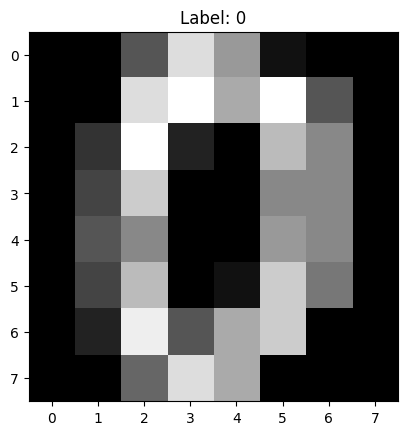

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(digits.images[0], cmap='gray')
plt.title(f"Label: {digits.target[0]}")
plt.show()


In [ ]:
train_images = pd.read_csv('csvTrainImages 13440x1024.csv', header=None)
train_labels = pd.read_csv('csvTrainLabel 13440x1.csv', header=None)
test_images  = pd.read_csv('csvTestImages 3360x1024.csv', header=None)
test_labels  = pd.read_csv('csvTestLabel 3360x1.csv', header=None)

X_all = pd.concat([train_images, test_images], axis=0).reset_index(drop=True)

y_all = pd.concat([train_labels, test_labels], axis=0).reset_index(drop=True)

print("Combined X shape:", X_all.shape)
print("Combined y shape:", y_all.shape)

# Save to new CSVs if you want
X_all.to_csv('AllImages.csv', index=False, header=False)
y_all.to_csv('AllLabels.csv', index=False, header=False)

Combined X shape: (16800, 1024)
Combined y shape: (16800, 1)


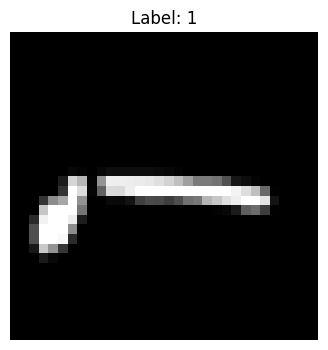

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Paths
train_img = 'csvTrainImages 13440x1024.csv'
train_lbl = 'csvTrainLabel 13440x1.csv'
test_img  = 'csvTestImages 3360x1024.csv'
test_lbl  = 'csvTestLabel 3360x1.csv'

# Load and combine


X_letters = pd.read_csv('/content/AllImages.csv').values
y_letters = pd.read_csv('/content/AllLabels.csv').values

# Pick first sample
first_image_1d = X_letters[0]
image_size = int(np.sqrt(len(first_image_1d)))
first_image_2d = first_image_1d.reshape(image_size, image_size)
first_label = y_letters[0][0]

# Plot
plt.figure(figsize=(4, 4))
plt.imshow(first_image_2d, cmap='gray')
plt.title(f"Label: {first_label}")
plt.axis('off')
plt.show()

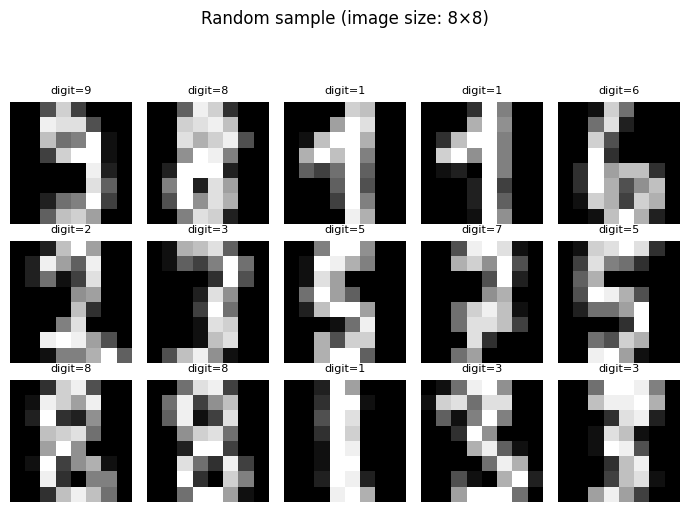

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Auto-detect image side length from feature count
n_pixels = X.shape[1]
side = int(math.isqrt(n_pixels))
if side * side != n_pixels:
    raise ValueError(f"Each row has {n_pixels} values, which is not a perfect square; "
                     f"cannot reshape to a square image.")

# Sample and plot
rng = np.random.default_rng(42)
idxs = rng.choice(len(X), size=15, replace=False)

fig, axes = plt.subplots(3, 5, figsize=(7, 5))
for ax, i in zip(axes.ravel(), idxs):
    ax.imshow(X[i].reshape(side, side), cmap="gray")
    # y can be 1D or 2D; handle both
    yi = y[i][0] if np.ndim(y[i]) > 0 else y[i]
    ax.set_title(f"digit={int(yi)}", fontsize=8)
    ax.axis("off")

plt.suptitle(f"Random sample (image size: {side}×{side})", fontsize=12, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



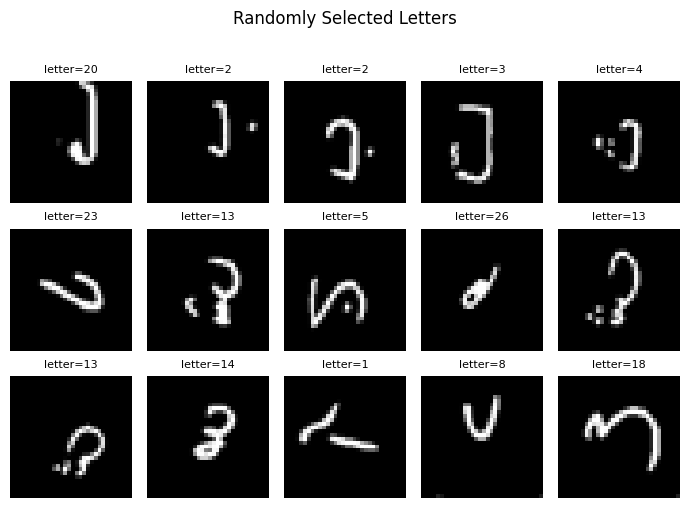

In [ ]:
h, w = 32, 32

ran = np.random.default_rng(42)
idxs = ran.choice(len(X_letters), size=15, replace=False)

fig, axes = plt.subplots(3, 5, figsize=(7, 5))

for ax, i in zip(axes.ravel(), idxs):
    ax.imshow(X_letters[i].reshape(h, w), cmap="gray")
    ax.set_title(f"letter={y_letters[i][0]}", fontsize=8)
    ax.axis("off")

plt.suptitle("Randomly Selected Letters", y=1.02)
plt.tight_layout()
plt.show()

Total components: 64
Top-5 explained variance ratio: [0.14890593 0.13618772 0.11794594 0.08409979 0.05782414]
Variance explained by 60 comps: 1.0000001


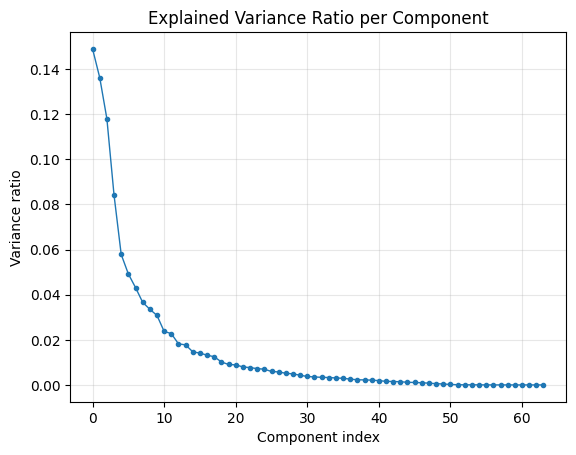

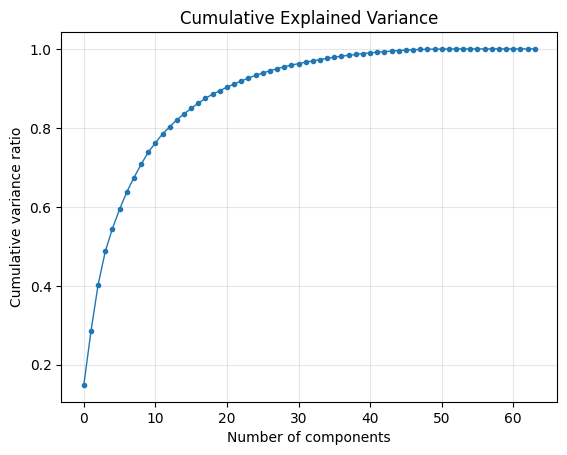

In [ ]:
from sklearn.decomposition import PCA

pca_full = PCA()
Z = pca_full.fit_transform(X2)
explained_variance = pca_full.explained_variance_
ratio = pca_full.explained_variance_ratio_
cum = ratio.cumsum()
print("Total components:", pca_full.n_components_)
print("Top-5 explained variance ratio:", ratio[:5])
print("Variance explained by 60 comps:", cum[60] if len(cum) > 60 else cum[-1])

# Plot spectrum
plt.figure()
plt.plot(ratio, marker=".", linewidth=1)
plt.title("Explained Variance Ratio per Component")
plt.xlabel("Component index")
plt.ylabel("Variance ratio")
plt.grid(alpha=0.3)
plt.show()

plt.figure()
plt.plot(cum, marker=".", linewidth=1)
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of components")
plt.ylabel("Cumulative variance ratio")
plt.grid(alpha=0.3)
plt.show()

Total components: 1024
Top-5 explained variance ratio: [0.06507573 0.05572923 0.03934148 0.03536409 0.03169541]
Variance explained by 700 comps: 0.9993358283734871


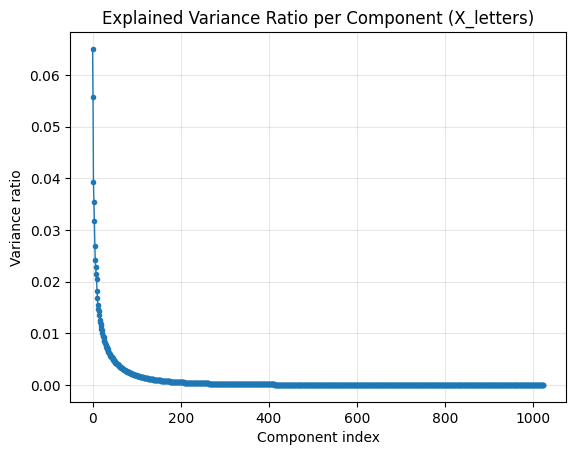

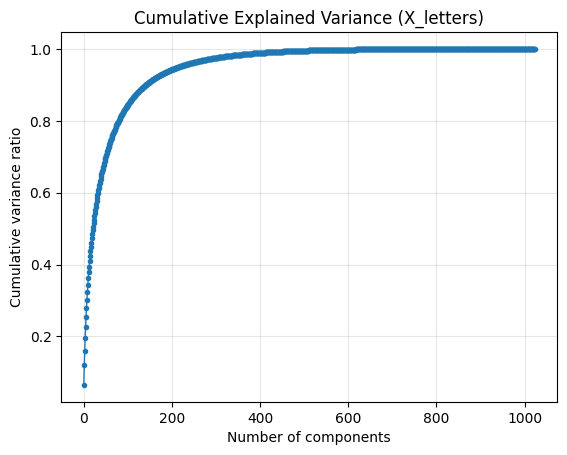

In [ ]:
pca_letters = PCA()
Z_letters = pca_letters.fit_transform(np.nan_to_num(X_letters, nan=0))
ratio = pca_letters.explained_variance_ratio_
cum = pca_letters.explained_variance_ratio_.cumsum()

print("Total components:", pca_letters.n_components_)
print("Top-5 explained variance ratio:", ratio[:5])
# Check if cum has at least 700 elements before accessing cum[700]
print("Variance explained by 700 comps:", cum[700] if len(cum) > 700 else cum[-1])


plt.figure()
plt.plot(ratio, marker=".", linewidth=1)
plt.title("Explained Variance Ratio per Component (X_letters)")
plt.xlabel("Component index")
plt.ylabel("Variance ratio")
plt.grid(alpha=0.3)
plt.show()

plt.figure()
plt.plot(cum, marker=".", linewidth=1)
plt.title("Cumulative Explained Variance (X_letters)")
plt.xlabel("Number of components")
plt.ylabel("Cumulative variance ratio")
plt.grid(alpha=0.3)
plt.show()

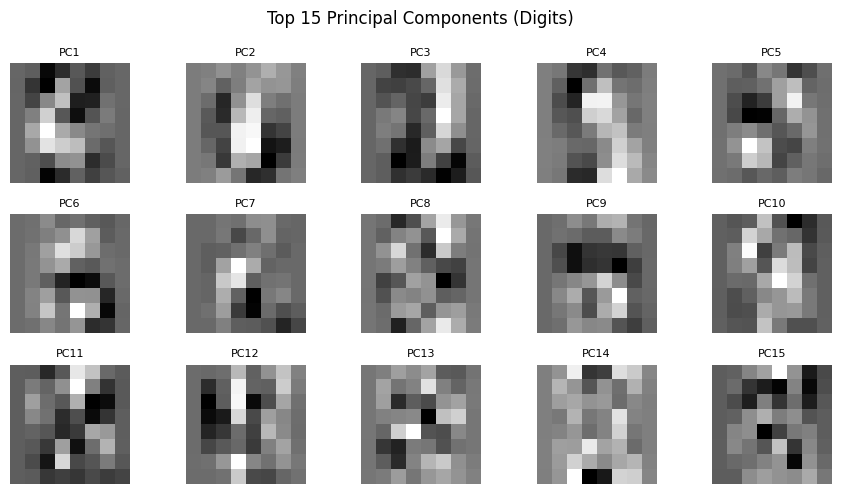

In [ ]:
# Get the correct dimensions for the digits dataset
digit_h, digit_w = digits.images.shape[1:]

k_show = 15
fig, axes = plt.subplots(3, 5, figsize=(9, 5))
for i, ax in enumerate(axes.ravel()):
    # Use the correct dimensions for reshaping
    ax.imshow(pca_full.components_[i].reshape(digit_h, digit_w), cmap="gray")
    ax.set_title(f"PC{i+1}", fontsize=8)
    ax.axis("off")
plt.suptitle("Top 15 Principal Components (Digits)")
plt.tight_layout()
plt.show()

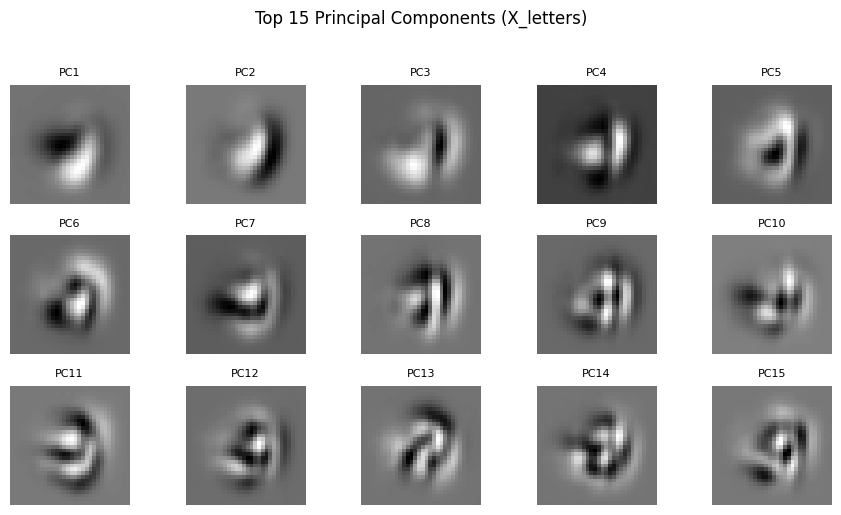

In [ ]:
_show = 15
fig, axes = plt.subplots(3, 5, figsize=(9, 5))

for i, ax in enumerate(axes.ravel()):
    ax.imshow(pca_letters.components_[i].reshape(h, w), cmap="gray")
    ax.set_title(f"PC{i+1}", fontsize=8)
    ax.axis("off")

plt.suptitle("Top 15 Principal Components (X_letters)", y=1.02)
plt.tight_layout()
plt.show()

(1, 5)
(1, 64)
(1, 10)
(1, 64)
(1, 15)
(1, 64)
(1, 20)
(1, 64)
(1, 25)
(1, 64)
(1, 30)
(1, 64)
(1, 60)
(1, 64)


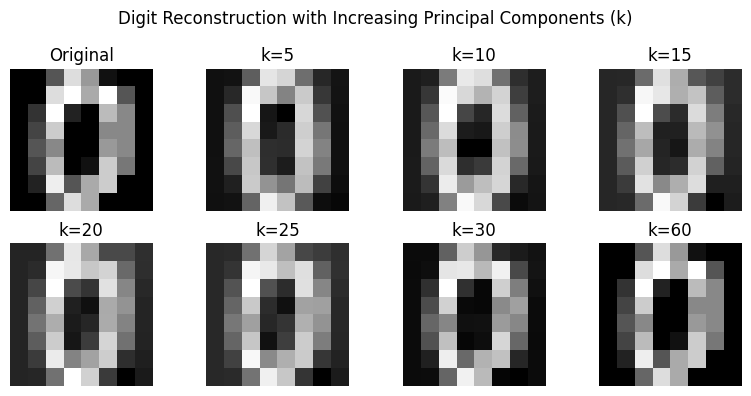

In [ ]:
i = 0
ks = [5,10, 15,20,25, 30, 60]

orig = X2[i:i+1]
recons = []

digit_h, digit_w = digits.images.shape[1:]

for k in ks:

    Wk = pca_full.components_[:k]

    Zk = np.dot(orig - pca_full.mean_, Wk.T)
    print(Zk.shape)
    Xk = np.dot(Zk, Wk) + pca_full.mean_
    print(Xk.shape)

    recons.append(Xk.reshape(digit_h, digit_w))

fig, axes = plt.subplots(2, 4, figsize=(8, 4))
axes = axes.flatten()[:8]

axes[0].imshow(X[i].reshape(digit_h, digit_w), cmap="gray")
axes[0].set_title("Original")
axes[0].axis("off")

for j, k in enumerate(ks[:7]):
    axes[j+1].imshow(recons[j], cmap="gray")
    axes[j+1].set_title(f"k={k}")
    axes[j+1].axis("off")

plt.suptitle("Digit Reconstruction with Increasing Principal Components (k)")
plt.tight_layout()
plt.show()

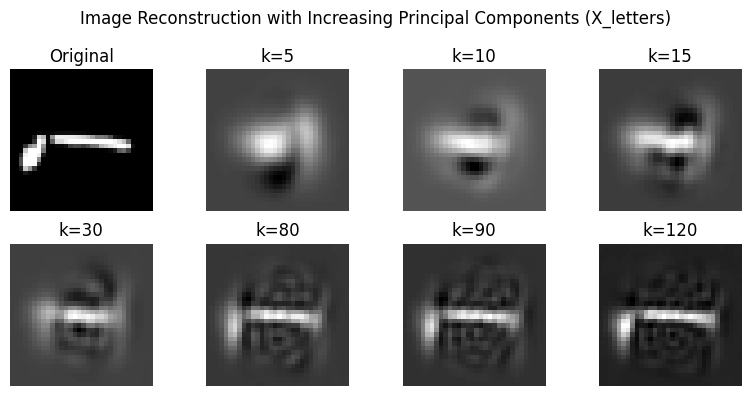

In [ ]:
i = 0
ks = [5, 10, 15, 30, 80, 90, 120]

orig = X_letters[i:i+1]
recons = []

for k in ks:
    Wk = pca_letters.components_[:k]
    Zk = np.dot(orig - pca_letters.mean_, Wk.T)
    Xk = np.dot(Zk, Wk) + pca_letters.mean_
    recons.append(Xk.reshape(h, w))

fig, axes = plt.subplots(2, 4, figsize=(8, 4))
axes = axes.flatten()[:8]

axes[0].imshow(X_letters[i].reshape(h, w), cmap="gray")
axes[0].set_title("Original")
axes[0].axis("off")

for j, k in enumerate(ks[:7]):
    axes[j+1].imshow(recons[j], cmap="gray")
    axes[j+1].set_title(f"k={k}")
    axes[j+1].axis("off")

plt.suptitle("Image Reconstruction with Increasing Principal Components (X_letters)")
plt.tight_layout()
plt.show()

**Try different variance targets: 90%, 95%, 98%. For each, compute the smallest k, train the classifier, and report accuracy.**

In [ ]:
# variance 0.95 triaing 80%
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

results = []
target = 0.95
k95 = int(np.searchsorted(pca_full.explained_variance_ratio_.cumsum(), target)) + 1

Zk = Z[:, :k95]
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(Zk, y, test_size=test_size, stratify=y, random_state=42)

clf = LogisticRegression(max_iter=3000, multi_class="auto")
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, pred)

print(f"Components for ≈95% variance: k={k95}")
print("Accuracy:", accuracy)
print("\nClassification report:\n", classification_report(y_test, pred, zero_division=0))

results.append({
        "Target Variance": f"{int(target*100)}%",
        "k Components": k95,
        "Training Ratio": f"{int((1-test_size)*100)}%",
        "Accuracy": round(accuracy, 4)
    })

Components for ≈95% variance: k=29
Accuracy: 0.9555555555555556

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        36
           1       0.89      0.86      0.87        36
           2       0.97      1.00      0.99        35
           3       0.97      1.00      0.99        37
           4       0.92      1.00      0.96        36
           5       1.00      0.97      0.99        37
           6       0.97      0.97      0.97        36
           7       0.92      0.97      0.95        36
           8       0.94      0.86      0.90        35
           9       0.97      0.97      0.97        36

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.95       360
weighted avg       0.96      0.96      0.96       360



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
# variance 0.95 triaing 80% on letters
# Re-load data to ensure consistent sample numbers
image_file_path = 'csvTrainImages 13440x1024.csv'
label_file_path = 'csvTrainLabel 13440x1.csv'
X_letters = pd.read_csv(image_file_path, header=None).values
y_letters = pd.read_csv(label_file_path, header=None).values

pca_letters = PCA()
# Fill NaN values with 0 before applying PCA
Z_letters = pca_letters.fit_transform(np.nan_to_num(X_letters, nan=0))
cum = pca_letters.explained_variance_ratio_.cumsum()

results_letters = []

target = 0.95
k95_letters = int(np.searchsorted(cum, target)) + 1
Zk_letters = Z_letters[:, :k95_letters]

print(f"Shape of Zk_letters before train_test_split: {Zk_letters.shape}")
print(f"Shape of y_letters before train_test_split: {y_letters.shape}")

test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(Zk_letters, y_letters, test_size=test_size, stratify=y_letters, random_state=42)

clf = LogisticRegression(max_iter=200, multi_class="auto", random_state=42)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, pred)

print(f"Components for ≈95% variance: k={k95_letters}")
print("Accuracy:", accuracy)
print("\nClassification report:\n", classification_report(y_test, pred, zero_division=0))

results_letters.append({
    "Target Variance": f"{int(target*100)}%",
    "k Components": k95_letters,
    "Training Ratio": f"{int((1-test_size)*100)}%",
    "Accuracy": round(accuracy, 4)
})

print("\nResults List (results_letters):", results_letters)

Shape of Zk_letters before train_test_split: (13440, 216)
Shape of y_letters before train_test_split: (13440, 1)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Components for ≈95% variance: k=216
Accuracy: 0.38467261904761907

Classification report:
               precision    recall  f1-score   support

           1       0.69      0.80      0.74        96
           2       0.48      0.61      0.54        96
           3       0.23      0.23      0.23        96
           4       0.32      0.40      0.36        96
           5       0.25      0.23      0.24        96
           6       0.21      0.19      0.20        96
           7       0.26      0.20      0.22        96
           8       0.38      0.50      0.43        96
           9       0.35      0.32      0.34        96
          10       0.45      0.53      0.49        96
          11       0.42      0.44      0.43        96
          12       0.45      0.52      0.48        96
          13       0.46      0.33      0.39        96
          14       0.44      0.41      0.42        96
          15       0.41      0.40      0.40        96
          16       0.36      0.36      0.36 

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# variance 0.90 triaing 70%
target = 0.90
k90 = int(np.searchsorted(pca_full.explained_variance_ratio_.cumsum(), target)) + 1

Zk = Z[:, :k90]
X_train, X_test, y_train, y_test = train_test_split(Zk, y, test_size=0.3, stratify=y, random_state=42)
test_size = 0.3
clf = LogisticRegression(max_iter=3000, multi_class="auto")
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

print(f"Components for ≈90% variance: k={k90}")
print("Accuracy:", accuracy_score(y_test, pred))
print("\nClassification report:\n", classification_report(y_test, pred, zero_division=0))
accuracy = accuracy_score(y_test, pred)
results.append({
        "Target Variance": f"{int(target*100)}%",
        "k Components": k90,
        "Training Ratio": f"{int((1-test_size)*100)}%",
        "Accuracy": round(accuracy, 4)
    })

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Components for ≈90% variance: k=21
Accuracy: 0.9296296296296296

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        54
           1       0.89      0.87      0.88        55
           2       0.98      0.98      0.98        53
           3       0.98      0.96      0.97        55
           4       0.90      0.96      0.93        54
           5       0.91      0.95      0.93        55
           6       0.91      0.98      0.95        54
           7       0.91      0.96      0.94        54
           8       0.88      0.83      0.85        52
           9       0.94      0.87      0.90        54

    accuracy                           0.93       540
   macro avg       0.93      0.93      0.93       540
weighted avg       0.93      0.93      0.93       540



In [ ]:
# variance 0.90 triaing 70% on letters

target = 0.90
k90_letters = int(np.searchsorted(cum, target)) + 1
Zk_letters = Z_letters[:, :k90_letters]

test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(
    Zk_letters,
    y_letters,
    test_size=test_size,
    stratify=y_letters,
    random_state=42
)
# X_train = pd.read_csv('/content/csvTrainImages 13440x1024.csv') # Remove this line
# X_test # This line is also not needed
clf = LogisticRegression(max_iter=200, multi_class="auto", random_state=42)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, pred)

print(f"Components for ≈{int(target*100)}% variance: k={k90_letters}")
print("Accuracy:", accuracy)
print("\nClassification report:\n", classification_report(y_test, pred, zero_division=0))

results_letters.append({
    "Target Variance": f"{int(target*100)}%",
    "k Components": k90_letters,
    "Training Ratio": f"{int((1-test_size)*100)}%",
    "Accuracy": round(accuracy, 4)
})

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Components for ≈90% variance: k=142
Accuracy: 0.392609126984127

Classification report:
               precision    recall  f1-score   support

           1       0.70      0.83      0.76       144
           2       0.41      0.60      0.49       144
           3       0.27      0.26      0.27       144
           4       0.33      0.35      0.34       144
           5       0.30      0.25      0.27       144
           6       0.24      0.18      0.20       144
           7       0.25      0.21      0.23       144
           8       0.36      0.51      0.42       144
           9       0.40      0.43      0.42       144
          10       0.44      0.54      0.48       144
          11       0.47      0.44      0.45       144
          12       0.43      0.46      0.44       144
          13       0.47      0.33      0.39       144
          14       0.48      0.38      0.42       144
          15       0.39      0.38      0.38       144
          16       0.36      0.31      0.34   

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# variance 0.85 triaing 60%
target = 0.85
k85= int(np.searchsorted(pca_full.explained_variance_ratio_.cumsum(), target)) + 1

Zk = Z[:, :k85]
X_train, X_test, y_train, y_test = train_test_split(Zk, y, test_size=0.4, stratify=y, random_state=42)
test_size = 0.4
clf = LogisticRegression(max_iter=3000, multi_class="auto")
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

print(f"Components for ≈85% variance: k={k85}")
print("Accuracy:", accuracy_score(y_test, pred))
print("\nClassification report:\n", classification_report(y_test, pred, zero_division=0))
accuracy = accuracy_score(y_test, pred)
results.append({
        "Target Variance": f"{int(target*100)}%",
        "k Components": k85,
        "Training Ratio": f"{int((1-test_size)*100)}%",
        "Accuracy": round(accuracy, 4)
    })

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Components for ≈85% variance: k=17
Accuracy: 0.933240611961057

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        71
           1       0.89      0.89      0.89        73
           2       0.99      0.93      0.96        71
           3       0.90      0.97      0.93        73
           4       0.92      0.96      0.94        72
           5       0.94      0.93      0.94        73
           6       0.91      0.96      0.93        72
           7       0.93      0.96      0.95        72
           8       0.91      0.89      0.90        70
           9       0.95      0.88      0.91        72

    accuracy                           0.93       719
   macro avg       0.93      0.93      0.93       719
weighted avg       0.93      0.93      0.93       719



In [ ]:
# variance 0.98 triaing 50%
target = 0.98
k98= int(np.searchsorted(pca_full.explained_variance_ratio_.cumsum(), target)) + 1

Zk = Z[:, :k98]
X_train, X_test, y_train, y_test = train_test_split(Zk, y, test_size=0.5, stratify=y, random_state=42)
test_size=0.5
clf = LogisticRegression(max_iter=3000, multi_class="auto")
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

print(f"Components for ≈98% variance: k={k98}")
print("Accuracy:", accuracy_score(y_test, pred))
print("\nClassification report:\n", classification_report(y_test, pred, zero_division=0))
accuracy = accuracy_score(y_test, pred)
results.append({
        "Target Variance": f"{int(target*100)}%",
        "k Components": k98,
        "Training Ratio": f"{int((1-test_size)*100)}%",
        "Accuracy": round(accuracy, 4)
    })


Components for ≈98% variance: k=37
Accuracy: 0.9543937708565072

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       0.94      0.93      0.94        91
           2       0.99      0.94      0.97        88
           3       0.97      0.97      0.97        92
           4       0.98      0.98      0.98        91
           5       0.97      0.96      0.96        91
           6       0.99      0.99      0.99        91
           7       0.93      0.98      0.95        89
           8       0.85      0.93      0.89        87
           9       0.94      0.87      0.90        90

    accuracy                           0.95       899
   macro avg       0.96      0.95      0.95       899
weighted avg       0.96      0.95      0.95       899



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
# variance 0.98 triaing 50% on letters
target = 0.98
k98_letters = int(np.searchsorted(cum, target)) + 1
Zk_letters = Z_letters[:, :k98_letters]

test_size = 0.5
X_train, X_test, y_train, y_test = train_test_split(
    Zk_letters,
    y_letters,
    test_size=test_size,
    stratify=y_letters,
    random_state=42
)

clf = LogisticRegression(max_iter=200, multi_class="auto", random_state=42)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, pred)

print(f"Components for ≈{int(target*100)}% variance: k={k98_letters}")
print("Accuracy:", accuracy)
print("\nClassification report:\n", classification_report(y_test, pred, zero_division=0))

results_letters.append({
    "Target Variance": f"{int(target*100)}%",
    "k Components": k98_letters,
    "Training Ratio": f"{int((1-test_size)*100)}%",
    "Accuracy": round(accuracy, 4)
})

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Components for ≈98% variance: k=327
Accuracy: 0.303422619047619

Classification report:
               precision    recall  f1-score   support

           1       0.64      0.67      0.65       240
           2       0.43      0.51      0.47       240
           3       0.22      0.20      0.21       240
           4       0.25      0.25      0.25       240
           5       0.26      0.20      0.23       240
           6       0.25      0.25      0.25       240
           7       0.20      0.19      0.20       240
           8       0.32      0.42      0.36       240
           9       0.33      0.32      0.32       240
          10       0.40      0.49      0.44       240
          11       0.36      0.38      0.37       240
          12       0.26      0.26      0.26       240
          13       0.26      0.23      0.24       240
          14       0.28      0.30      0.29       240
          15       0.26      0.25      0.25       240
          16       0.27      0.26      0.27   

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Trying KNN on Letters dataset
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(
    Zk_letters,
    y_letters,
    test_size=test_size,
    stratify=y_letters,
    random_state=42
)

knn.fit(X_train, y_train)
pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, pred)

print(f"Components for ≈{int(target*100)}% variance: k={k90_letters}")
print("Accuracy:", accuracy)
print("\nClassification report:\n", classification_report(y_test, pred, zero_division=0))

results_letters.append({
    "Target Variance": f"{int(target*100)}%",
    "k Components": k90_letters,
    "Training Ratio": f"{int((1-test_size)*100)}%",
    "Accuracy": round(accuracy, 4)
})


/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Components for ≈98% variance: k=142
Accuracy: 0.46378968253968256

Classification report:
               precision    recall  f1-score   support

           1       0.82      0.94      0.87       144
           2       0.31      0.76      0.45       144
           3       0.31      0.40      0.35       144
           4       0.41      0.34      0.37       144
           5       0.44      0.54      0.48       144
           6       0.36      0.42      0.39       144
           7       0.39      0.24      0.29       144
           8       0.27      0.73      0.39       144
           9       0.28      0.26      0.27       144
          10       0.30      0.78      0.44       144
          11       0.32      0.27      0.29       144
          12       0.41      0.61      0.49       144
          13       0.58      0.17      0.27       144
          14       0.54      0.43      0.48       144
          15       0.57      0.27      0.37       144
          16       0.56      0.54      0.55 

**Summary of Logistic Regression Accuracy at Different PCA Variance Thresholds and Training Ratios**

In [ ]:
df_results = pd.DataFrame(results)
print(df_results)

  Target Variance  k Components Training Ratio  Accuracy
0             95%            29            80%    0.9556
1             90%            21            70%    0.9296
2             85%            17            60%    0.9332
3             98%            37            50%    0.9544


In [ ]:
df_results_letters = pd.DataFrame(results_letters)
print(df_results_letters)

  Target Variance  k Components Training Ratio  Accuracy
0             95%           216            80%    0.3847
1             90%           142            70%    0.3926
2             98%           327            50%    0.3034
3             98%           142            70%    0.4638


**Plot accuracy vs k using a grid of k values (e.g., 10–200 step 10). Where is the elbow?**

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

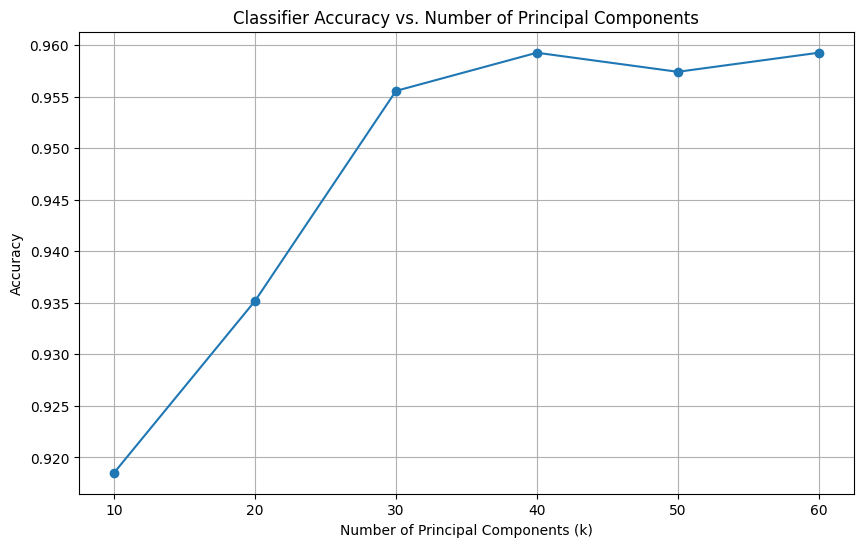

Accuracy scores for different k values:
k=10: 0.9185
k=20: 0.9352
k=30: 0.9556
k=40: 0.9593
k=50: 0.9574
k=60: 0.9593


In [ ]:
k_values = range(10, 65, 10)

accuracy_scores = []


for k in k_values:

    Zk = Z[:, :k]

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(Zk, y, test_size=0.3, stratify=y, random_state=42)


    clf = LogisticRegression(max_iter=3000, multi_class="auto")
    clf.fit(X_train, y_train)

    # Predict and calculate accuracy
    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    accuracy_scores.append(accuracy)


plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel('Number of Principal Components (k)')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy vs. Number of Principal Components')
plt.grid(True)
plt.show()


print("Accuracy scores for different k values:")
for k, accuracy in zip(k_values, accuracy_scores):
    print(f"k={k}: {accuracy:.4f}")

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.htm

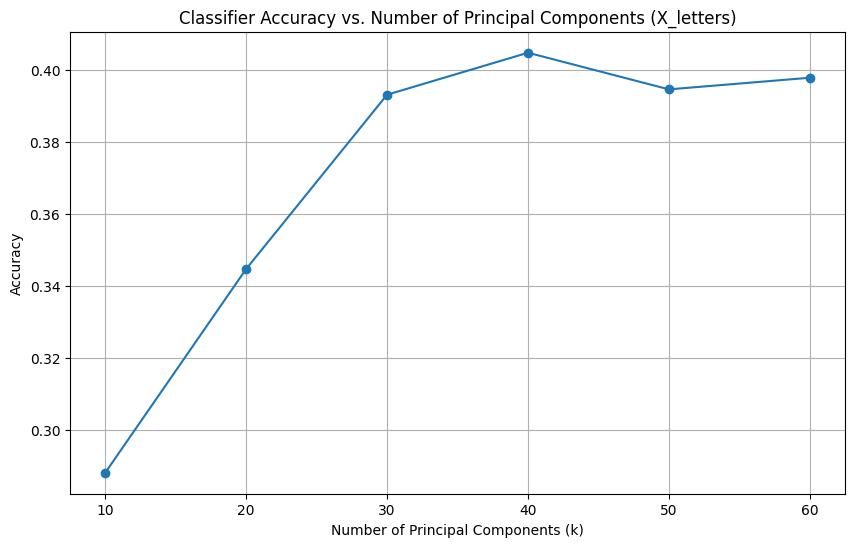

Accuracy scores for different k values:
k=10: 0.2882
k=20: 0.3447
k=30: 0.3931
k=40: 0.4048
k=50: 0.3946
k=60: 0.3978


In [ ]:
# on letters
k_values = range(10, 65, 10)

accuracy_scores = []

for k in k_values:
    # Slice the transformed data Z_letters
    Zk = Z_letters[:, :k]

    # Split data using y_letters
    X_train, X_test, y_train, y_test = train_test_split(Zk, y_letters, test_size=0.3, stratify=y_letters, random_state=42)

    # Train classifier
    clf = LogisticRegression(max_iter=100, multi_class="auto", random_state=42)
    clf.fit(X_train, y_train)

    # Predict and calculate accuracy
    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    accuracy_scores.append(accuracy)


plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel('Number of Principal Components (k)')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy vs. Number of Principal Components (X_letters)')
plt.grid(True)
plt.show()


print("Accuracy scores for different k values:")
for k, accuracy in zip(k_values, accuracy_scores):
    print(f"k={k}: {accuracy:.4f}")

3. **stratified splits by numbers(already done via labels). Explain why stratification matters.**

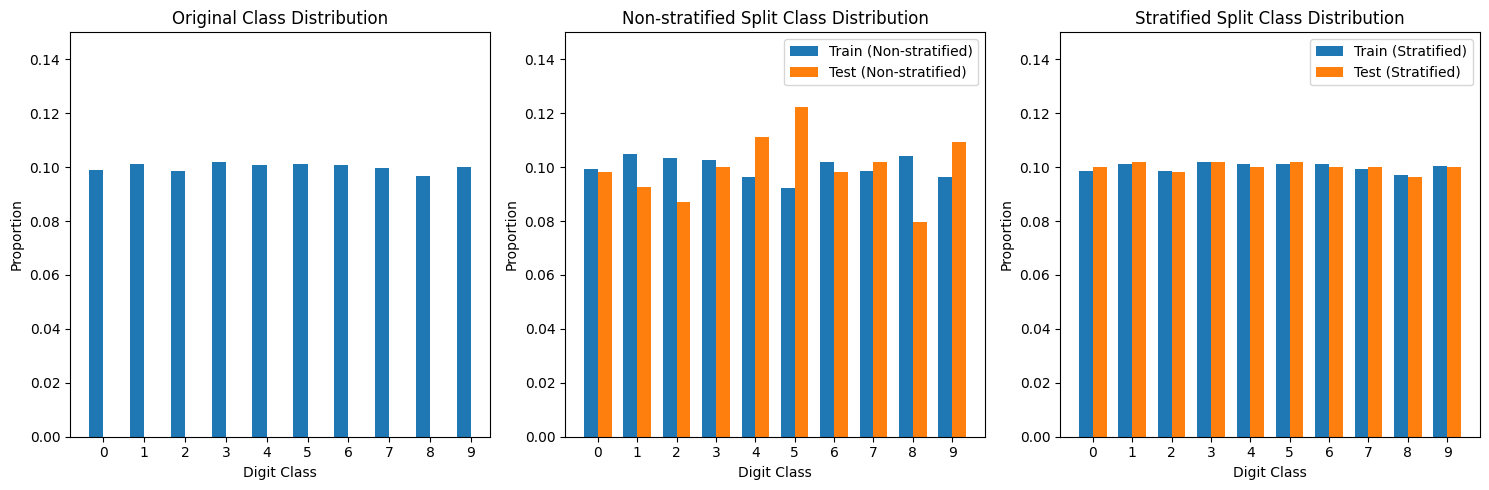

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

original_distribution = pd.Series(y).value_counts(normalize=True).sort_index()

X_train_no_stratify, X_test_no_stratify, y_train_no_stratify, y_test_no_stratify = train_test_split(X2, y, test_size=0.3, random_state=42)

train_distribution_no_stratify = pd.Series(y_train_no_stratify).value_counts(normalize=True).sort_index()
test_distribution_no_stratify = pd.Series(y_test_no_stratify).value_counts(normalize=True).sort_index()

X_train_stratify, X_test_stratify, y_train_stratify, y_test_stratify = train_test_split(X2, y, test_size=0.3, stratify=y, random_state=42)

train_distribution_stratify = pd.Series(y_train_stratify).value_counts(normalize=True).sort_index()
test_distribution_stratify = pd.Series(y_test_stratify).value_counts(normalize=True).sort_index()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

bar_width = 0.35
index = np.arange(len(original_distribution.index))

plots = [
    ("Original Class Distribution", [original_distribution], ["Original"]),
    ("Non-stratified Split Class Distribution", [train_distribution_no_stratify, test_distribution_no_stratify],
     ["Train (Non-stratified)", "Test (Non-stratified)"]),
    ("Stratified Split Class Distribution", [train_distribution_stratify, test_distribution_stratify],
     ["Train (Stratified)", "Test (Stratified)"])
]

for ax, (title, data, labels) in zip(axes, plots):
    for i, d in enumerate(data):
        ax.bar(index + (i - 0.5) * bar_width, d.values, bar_width, label=labels[i])
    ax.set(xlabel='Digit Class', ylabel='Proportion', title=title,
           xticks=index, xticklabels=original_distribution.index, ylim=(0, 0.15))
    if len(labels) > 1: ax.legend()

plt.tight_layout()
plt.show()

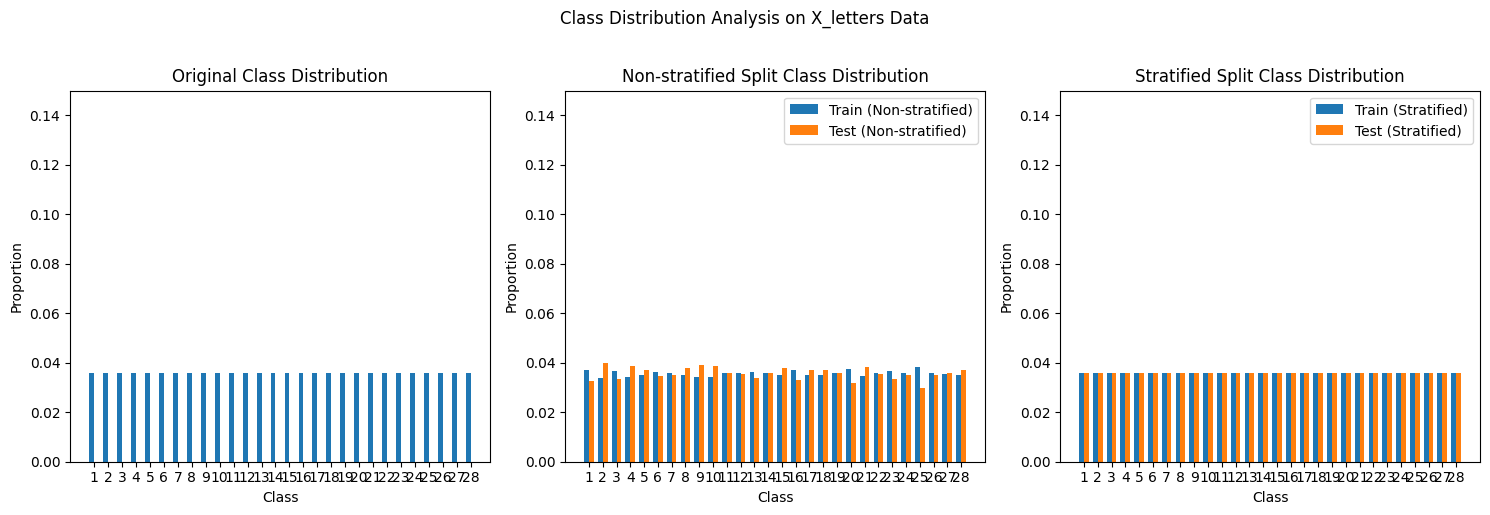

In [ ]:
#on letters
original_distribution = pd.Series(y_letters.ravel()).value_counts(normalize=True).sort_index()

X_train_no_stratify, X_test_no_stratify, y_train_no_stratify, y_test_no_stratify = train_test_split(
    X_letters, y_letters, test_size=0.3, random_state=42
)

train_distribution_no_stratify = pd.Series(y_train_no_stratify.ravel()).value_counts(normalize=True).sort_index()
test_distribution_no_stratify = pd.Series(y_test_no_stratify.ravel()).value_counts(normalize=True).sort_index()

X_train_stratify, X_test_stratify, y_train_stratify, y_test_stratify = train_test_split(
    X_letters, y_letters, test_size=0.3, stratify=y_letters, random_state=42
)

train_distribution_stratify = pd.Series(y_train_stratify.ravel()).value_counts(normalize=True).sort_index()
test_distribution_stratify = pd.Series(y_test_stratify.ravel()).value_counts(normalize=True).sort_index()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

bar_width = 0.35
index = np.arange(len(original_distribution.index))

plots = [
    ("Original Class Distribution", [original_distribution], ["Original"]),
    ("Non-stratified Split Class Distribution", [train_distribution_no_stratify, test_distribution_no_stratify],
     ["Train (Non-stratified)", "Test (Non-stratified)"]),
    ("Stratified Split Class Distribution", [train_distribution_stratify, test_distribution_stratify],
     ["Train (Stratified)", "Test (Stratified)"])
]

for ax, (title, data, labels) in zip(axes, plots):
    for i, d in enumerate(data):
        ax.bar(index + (i - 0.5) * bar_width, d.values, bar_width, label=labels[i])
    ax.set(xlabel='Class', ylabel='Proportion', title=title,
            xticks=index, xticklabels=original_distribution.index, ylim=(0, 0.15))
    if len(labels) > 1: ax.legend()

plt.suptitle("Class Distribution Analysis on X_letters Data", y=1.02)
plt.tight_layout()
plt.show()

**PCA Scree Plot**

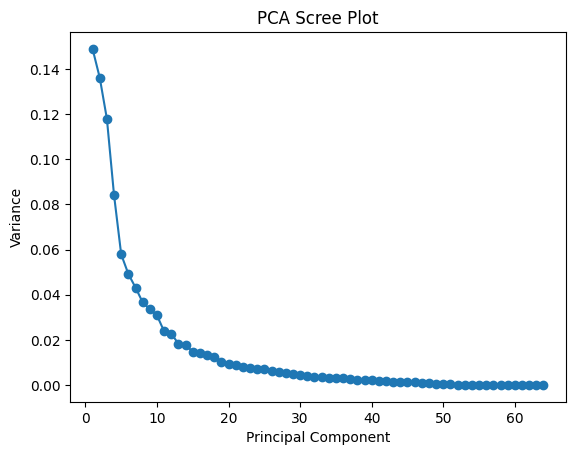

In [ ]:
plt.plot(range(1, len(pca_full.explained_variance_ratio_)+1),
         pca_full.explained_variance_ratio_, 'o-')
plt.xlabel("Principal Component")
plt.ylabel("Variance")
plt.title("PCA Scree Plot")
plt.show()

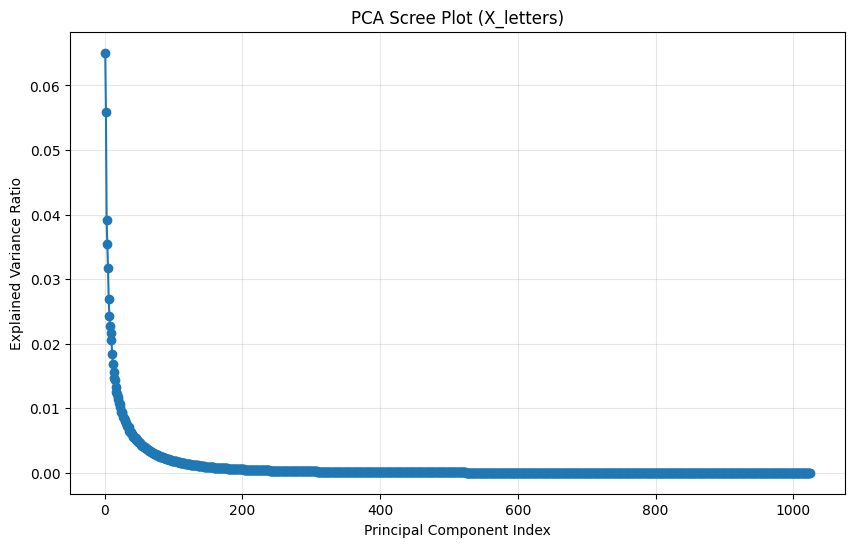

In [ ]:
num_components = len(pca_letters.explained_variance_ratio_)

plt.figure(figsize=(10, 6))

# Plot the explained variance ratio for each component
plt.plot(range(1, num_components + 1),
         pca_letters.explained_variance_ratio_, 'o-')

plt.xlabel("Principal Component Index")
plt.ylabel("Explained Variance Ratio")
plt.title("PCA Scree Plot (X_letters)")
plt.grid(True, alpha=0.3)
plt.show()